## Stroke Prediction

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

#### Importing Dataset

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Dimensions of data

In [54]:
print(f'The dataset consist of {df.shape[1]} columns and {df.shape[0]} observations.')

The dataset consist of 14 columns and 5110 observations.


#### Data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Categorical and numerical variables

In [5]:
cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
num = ['id','age','avg_glucose_level','bmi']

In [6]:
df['hypertension'] = df['hypertension'].astype('object' )
df['heart_disease'] = df['heart_disease'].astype('object')
df['stroke'] = df['stroke'].astype('object')

In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

#### Dataset Summary

In [8]:
df.describe(include = np.number)

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


* The count is not same for every variables thus the chance of missing values is possible.
* The min values of age is close to zero thus presence of outliers are possible.
* The average age of patients in the dataset is 43.

In [9]:
df.describe(include = object)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


* Female patients are more in the datasets.
* Most of them are married in patients.
* Most of them lives in urban and they do not have any heart dieases or hypertension.

#### Checking for null values and imputation

In [10]:
# Checking for missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df.skew()

id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

* Since the variables are skewed and distribution is not normal hence following median imputation.

In [12]:
# Imputation
df.bmi.fillna(df.bmi.median() , inplace = True)

In [13]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Univariate Analysis

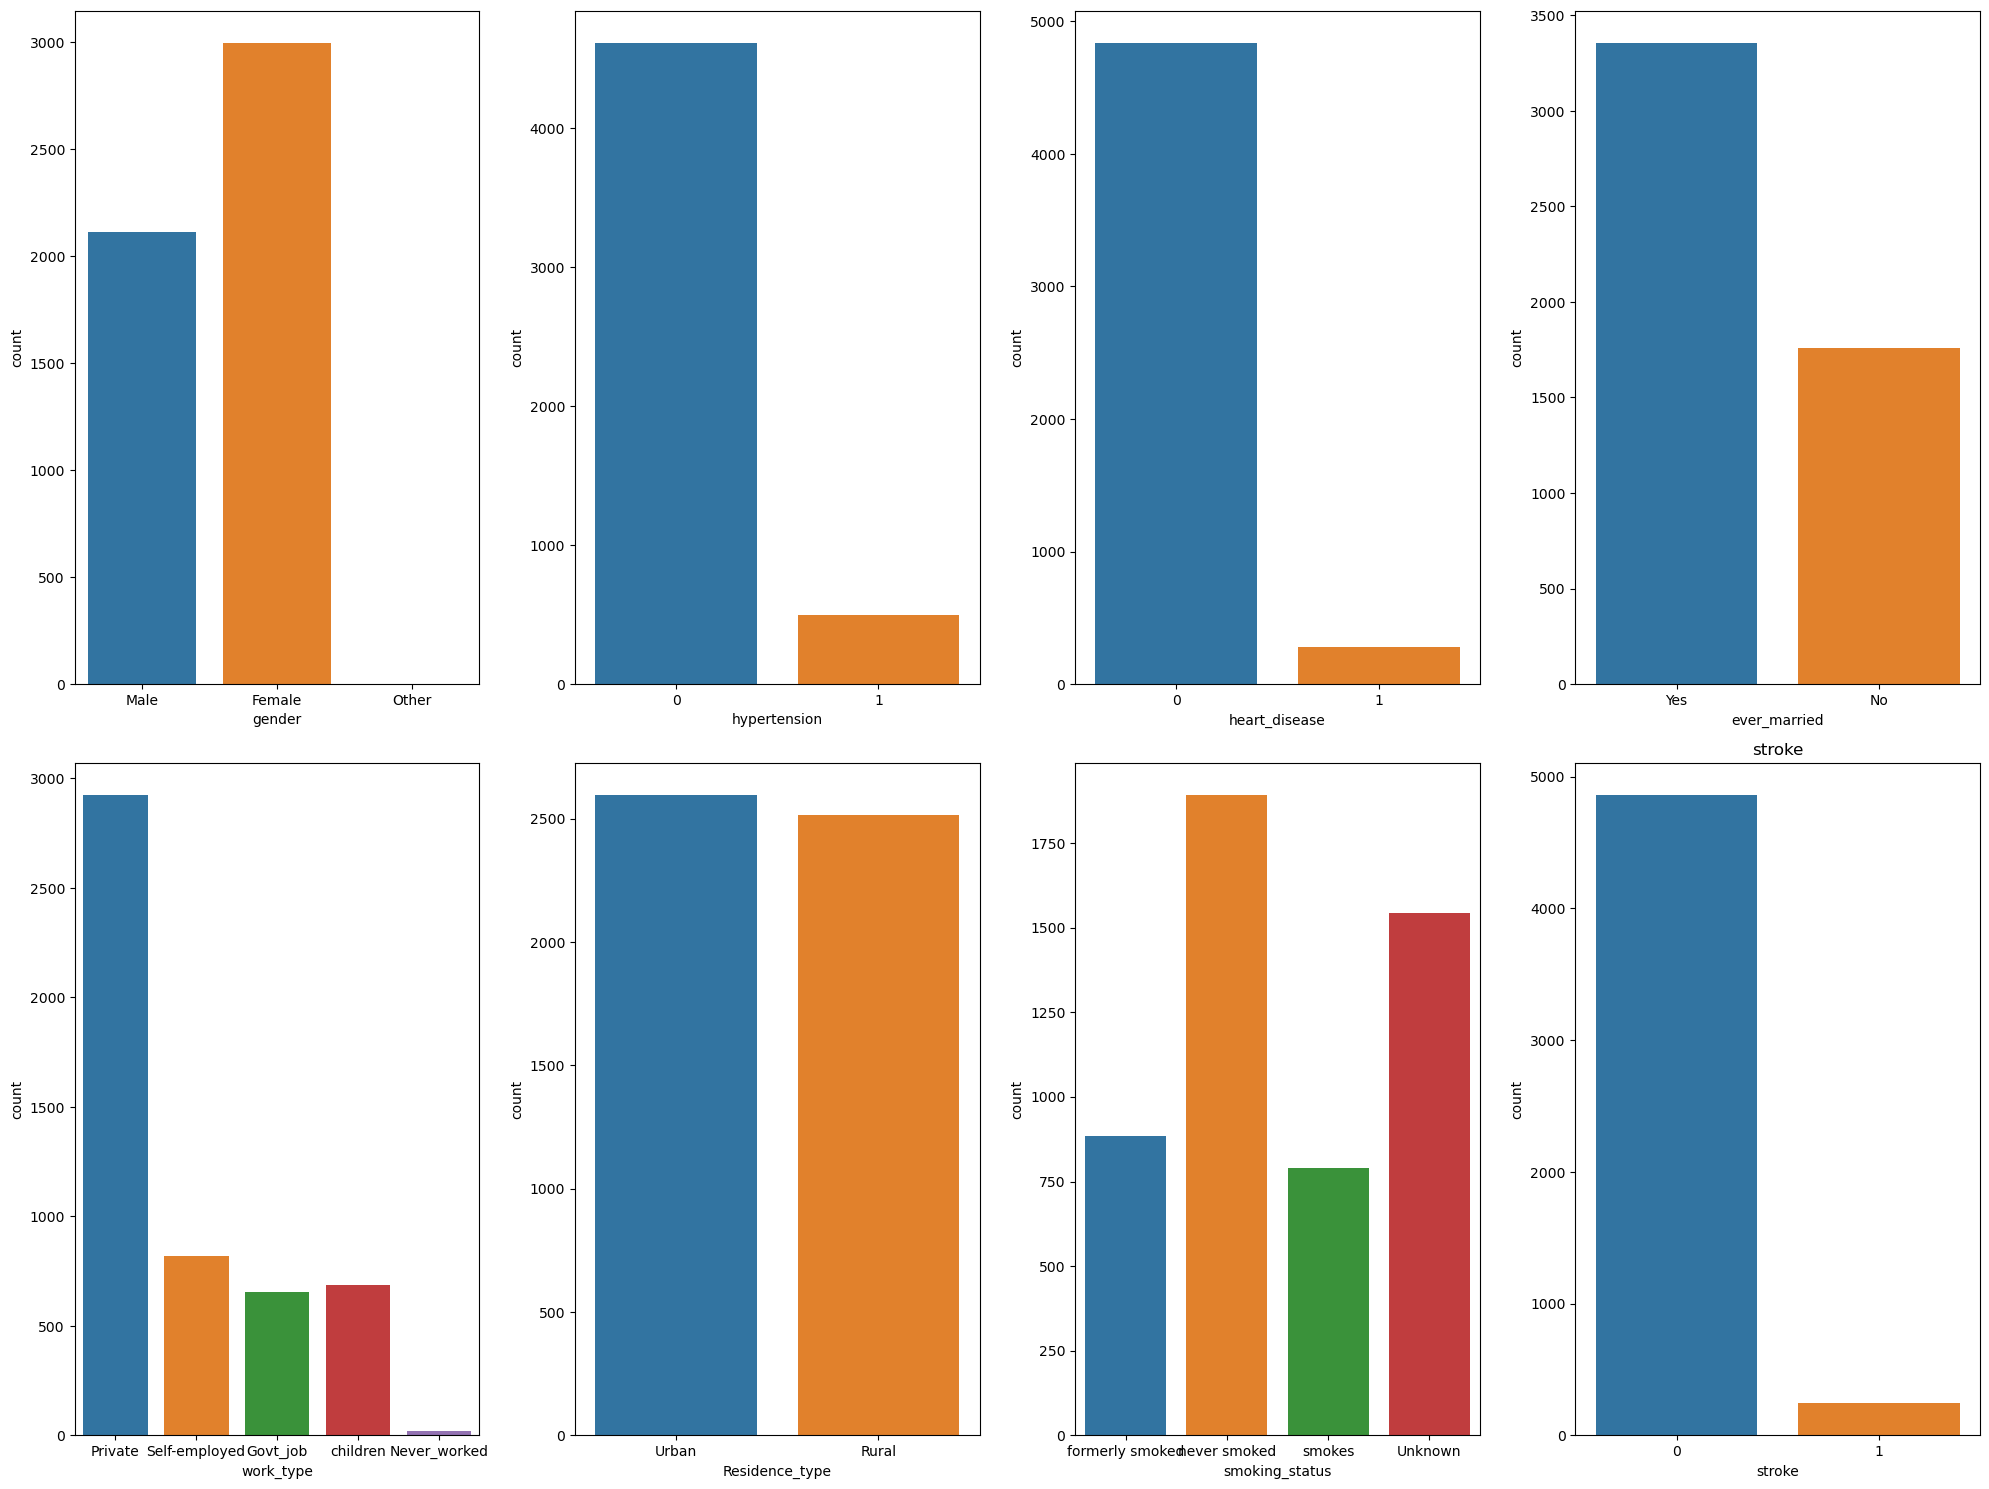

In [14]:
f, ax = plt.subplots(2,4 , figsize = (20,15))

for i,v in zip(cat , ax.flatten()):
    sns.countplot(x = df[i] , ax = v)
    plt.title(i)
plt.tight_layout()
plt.show()

#### Bivariate Analysis

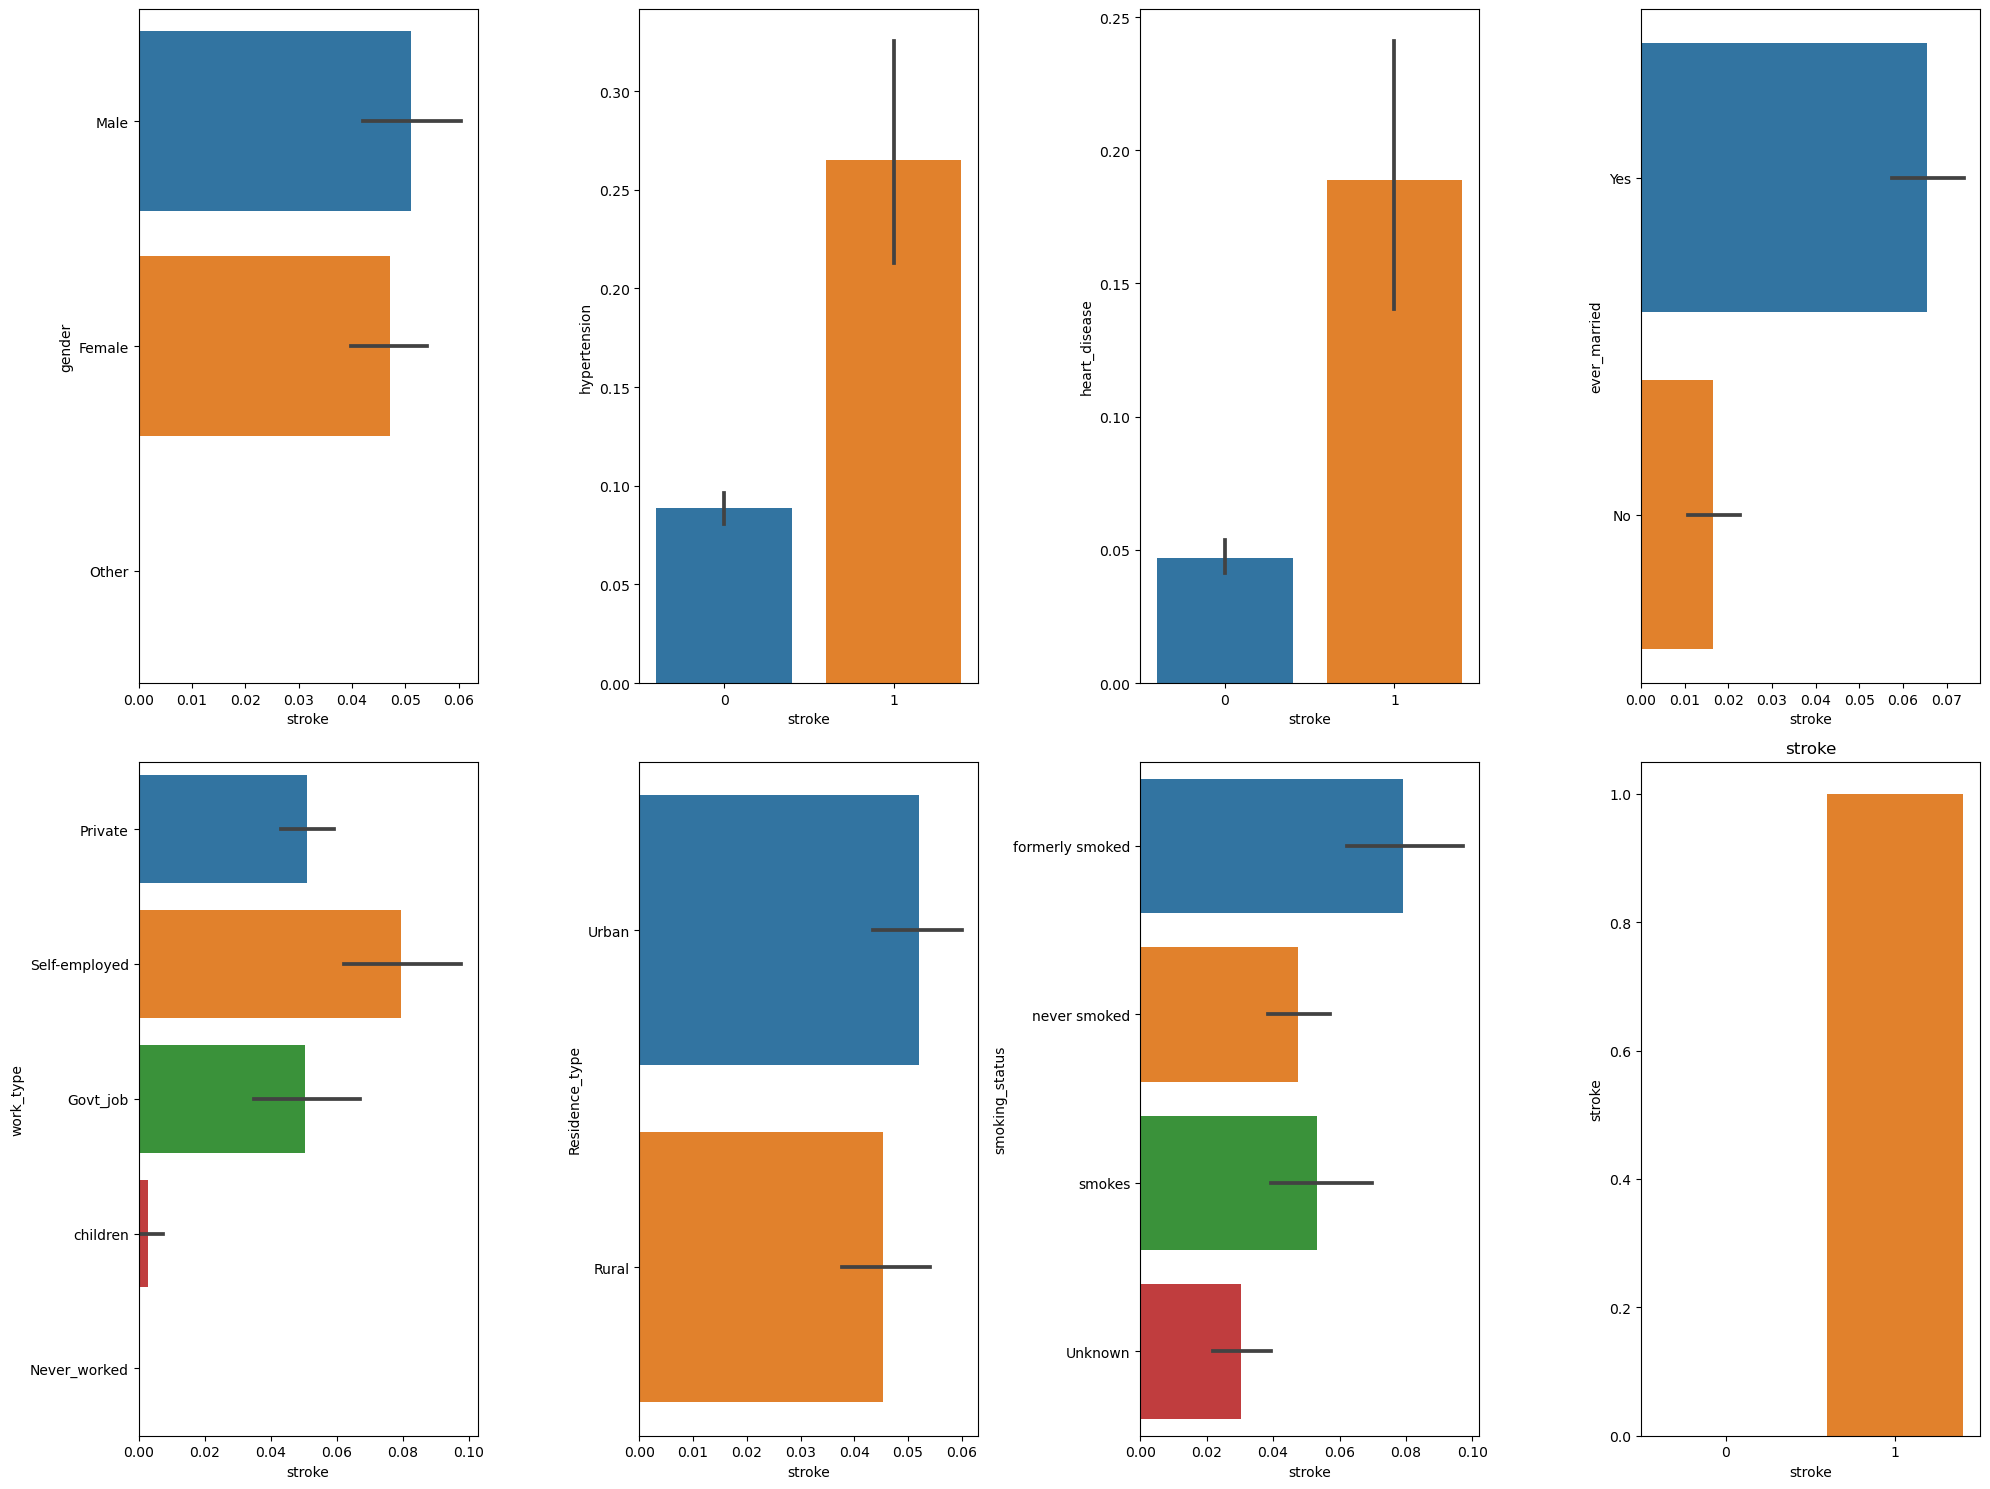

In [15]:
f, ax = plt.subplots(2,4 , figsize = (20,15))

for i,v in zip(cat , ax.flatten()):
    sns.barplot(y = df[i] , x = df.stroke , ax = v)
    plt.title(i)
plt.tight_layout()
plt.show()

#### checking for outliers

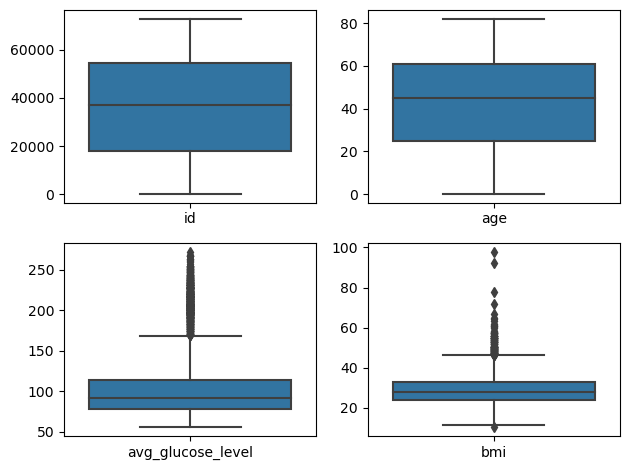

In [16]:
f , ax = plt.subplots(2,2 )

for i , x in zip(num , ax.flatten()):
    sns.boxplot(df[[i]] , ax=x)
plt.tight_layout()
plt.show()

* From the above plot Avg_gulcose_level and bmi has some outliers.

#### checking for skewness

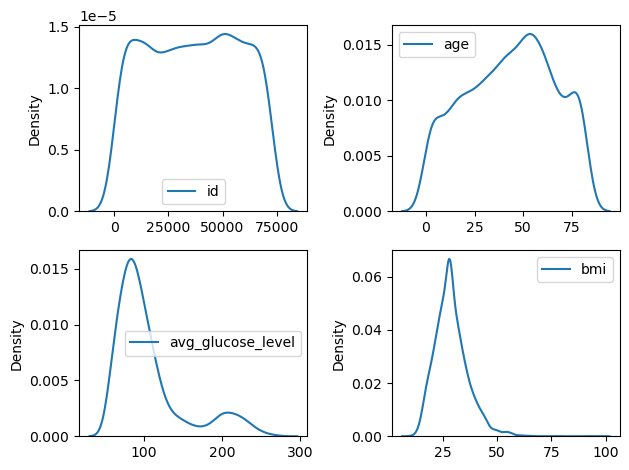

In [17]:
f , ax = plt.subplots(2,2 )

for i , x in zip(num , ax.flatten()):
    sns.kdeplot(df[[i]] , ax=x)
plt.tight_layout()
plt.show()

In [18]:
df[num].skew()

id                  -0.019913
age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.088187
dtype: float64

* Since some variables are having outliers and skewness it is good to go with power transformation than IQR as it leads loss of data.

#### Power Transformation

In [19]:
from sklearn.preprocessing import PowerTransformer

In [20]:
pt = PowerTransformer()
for i in num:
    df[i] = pt.fit_transform(df[[i]])

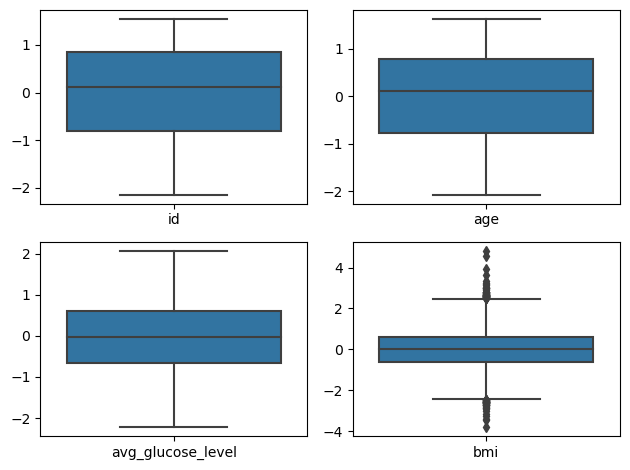

In [21]:
f , ax = plt.subplots(2,2 )

for i , x in zip(num , ax.flatten()):
    sns.boxplot(df[[i]] , ax=x)
plt.tight_layout()
plt.show()

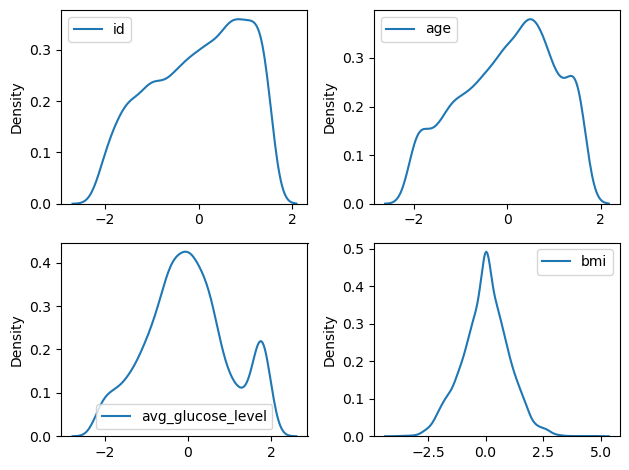

In [22]:
f , ax = plt.subplots(2,2 )

for i , x in zip(num , ax.flatten()):
    sns.kdeplot(df[[i]] , ax=x)
plt.tight_layout()
plt.show()

* After transformation we can see that the outliers and skewness has been treated.

#### Statistical test

In [23]:
df_stat = pd.DataFrame(columns=['Attribute','p_value','Remarks'])

In [24]:
for i in num:
    g = [  df.loc[df['stroke']==sub ,i]          for sub in df.stroke.unique()]
    
    s ,p = stats.f_oneway(*g)
    
    df_stat = df_stat.append({'Attribute': i, 
                              'p_value':p, 
                              'Remarks':'significant' if p < 0.05 else 'insignificant'},ignore_index=True)
df_stat

,Attribute,p_value,Remarks
0,id,7.528870e-01,insignificant
1,age,4.251048e-67,significant
2,avg_glucose_level,5.748262e-12,significant
3,bmi,3.034640e-04,significant


In [25]:
from scipy.stats import chi2_contingency

In [26]:
for i in cat:
    test , p , dof , exp = stats.chi2_contingency(pd.crosstab(df['stroke'], df[i]),correction= False)
    df_stat = df_stat.append({'Attribute': i, 
                              'p_value':p, 
                              'Remarks':'significant' if p < 0.05 else 'insignificant'},ignore_index=True)
df_stat

,Attribute,p_value,Remarks
0,id,7.528870e-01,insignificant
1,age,4.251048e-67,significant
2,avg_glucose_level,5.748262e-12,significant
3,bmi,3.034640e-04,significant
4,gender,7.895491e-01,insignificant
5,hypertension,6.068123e-20,significant
6,heart_disease,5.200110e-22,significant
7,ever_married,9.589325e-15,significant
8,work_type,5.397708e-10,significant
9,Residence_type,2.691590e-01,insignificant


In [27]:
df_stat[df_stat.Remarks == 'significant']

,Attribute,p_value,Remarks
1,age,4.251048e-67,significant
2,avg_glucose_level,5.748262e-12,significant
3,bmi,3.034640e-04,significant
5,hypertension,6.068123e-20,significant
6,heart_disease,5.200110e-22,significant
7,ever_married,9.589325e-15,significant
8,work_type,5.397708e-10,significant
10,smoking_status,2.085400e-06,significant
11,stroke,0.000000e+00,significant


* After statistical test we are dropping the insigficant variables that are not contributing for the prediction.

In [28]:
insig_cols = list(df_stat['Attribute'][df_stat.Remarks == 'insignificant'])
df.drop(columns= insig_cols , inplace= True)

In [29]:
cat.remove('Residence_type')
cat.remove('gender')
num.remove('id')

#### Encoding

In [30]:
df.ever_married.replace({'No':0,'Yes':1} , inplace = True)

In [31]:
# Converting already encoded columns from categorical to numerical.
cols_num = ['hypertension','stroke','heart_disease']

for i in cols_num:
    df[i] = df[i].astype('int')

In [32]:
df = pd.get_dummies(df,drop_first=True)

In [33]:
df.dtypes

age                               float64
hypertension                        int32
heart_disease                       int32
ever_married                        int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int32
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

#### Target variable analysis

In [34]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<Axes: ylabel='stroke'>

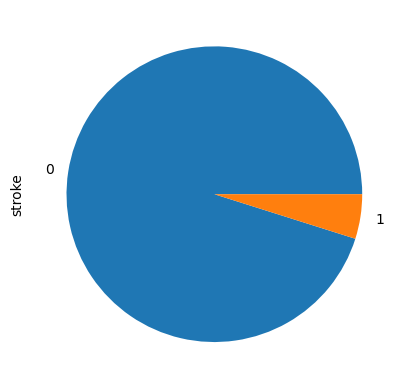

In [35]:
df.stroke.value_counts().plot(kind = 'pie', )

* The dataset is imbalanced.
* Class 0 represents patients who does not have stroke.
* Class 1 represents patients who have stroke.

#### Train test split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x = df.drop(['stroke'],axis=1)
y = df['stroke']
xtrain , xtest , ytrain ,ytest = train_test_split(x,y,test_size=0.3,random_state=45 ,stratify=y)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3577, 13)
(1533, 13)
(3577,)
(1533,)


#### Scorecard

In [38]:
from sklearn.metrics import accuracy_score , f1_score , classification_report

In [39]:
scorecard = pd.DataFrame(columns = ['Model_name','train_accuracy','test_accuracy','train_f1','test_f1'])

In [40]:
def update_scorecard(name,model):
    global scorecard
    
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    
    
    
    scorecard = scorecard.append({'Model_name':name,
                                  'train_accuracy': accuracy_score(ytrain,ypred_train),
                                  'test_accuracy': accuracy_score(ytest , ypred_test),
                                  'train_f1': f1_score(ytrain , ypred_train ,average= 'weighted'),
                                  'test_f1': f1_score(ytest , ypred_test , average= 'weighted')}, ignore_index = True)

In [41]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(xtrain ,ytrain)

update_scorecard('Logistic', lr)
scorecard

,Model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Logistic,0.951356,0.951729,0.92764,0.928825


In [42]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(xtrain , ytrain)

update_scorecard('KNN ', knn)
scorecard

,Model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Logistic,0.951356,0.951729,0.927640,0.928825
1,KNN,0.954990,0.948467,0.939385,0.927113


In [43]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=45).fit(xtrain , ytrain)

update_scorecard('Decision tree', dt)
scorecard

,Model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Logistic,0.951356,0.951729,0.927640,0.928825
1,KNN,0.954990,0.948467,0.939385,0.927113
2,Decision tree,1.000000,0.912590,1.000000,0.913665


In [44]:
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier

In [45]:
# Random forest

rf = RandomForestClassifier(random_state=55).fit(xtrain , ytrain)

update_scorecard('Random forest', rf)
scorecard

,Model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Logistic,0.951356,0.951729,0.927640,0.928825
1,KNN,0.954990,0.948467,0.939385,0.927113
2,Decision tree,1.000000,0.912590,1.000000,0.913665
3,Random forest,1.000000,0.947162,1.000000,0.926430


In [46]:
# Ada Boost

ada = AdaBoostClassifier(random_state=55).fit(xtrain , ytrain)

update_scorecard('Ada boost', ada)
scorecard

,Model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Logistic,0.951356,0.951729,0.927640,0.928825
1,KNN,0.954990,0.948467,0.939385,0.927113
2,Decision tree,1.000000,0.912590,1.000000,0.913665
3,Random forest,1.000000,0.947162,1.000000,0.926430
4,Ada boost,0.951635,0.950424,0.930895,0.928140


In [47]:
# Gradient Boost

gboost = GradientBoostingClassifier(random_state=55).fit(xtrain , ytrain)

update_scorecard('Gradient boost', gboost)
scorecard

,Model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Logistic,0.951356,0.951729,0.927640,0.928825
1,KNN,0.954990,0.948467,0.939385,0.927113
2,Decision tree,1.000000,0.912590,1.000000,0.913665
3,Random forest,1.000000,0.947162,1.000000,0.926430
4,Ada boost,0.951635,0.950424,0.930895,0.928140
5,Gradient boost,0.961420,0.949119,0.949423,0.927455


In [48]:
# XG Boost

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 85).fit(xtrain , ytrain)

update_scorecard('XG boost', xgb)
scorecard

,Model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Logistic,0.951356,0.951729,0.927640,0.928825
1,KNN,0.954990,0.948467,0.939385,0.927113
2,Decision tree,1.000000,0.912590,1.000000,0.913665
3,Random forest,1.000000,0.947162,1.000000,0.926430
4,Ada boost,0.951635,0.950424,0.930895,0.928140
5,Gradient boost,0.961420,0.949119,0.949423,0.927455
6,XG boost,0.999441,0.942596,0.999439,0.926973


* Since the dataset is imbalance we can look at the f1 score for measuring efficiency of the model.
* By comparing the train and test f1 score of models Ada boost performs well and it provides best efficient model for stroke prediction.

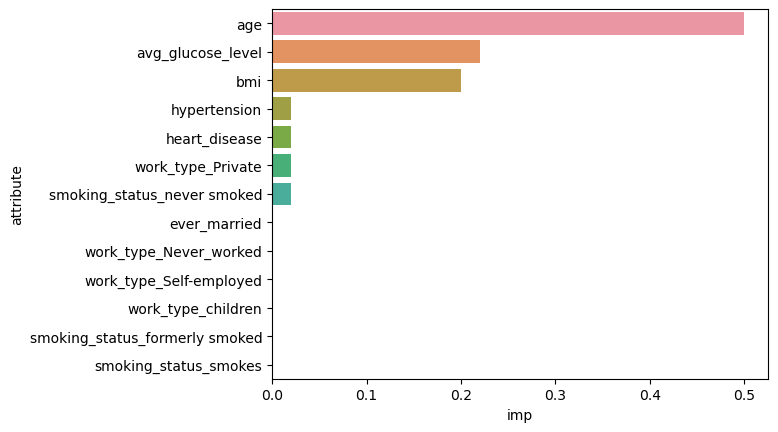

In [52]:
imp_fea = pd.DataFrame()
imp_fea['attribute'] = xtrain.columns
imp_fea['imp'] = ada.feature_importances_
imp_fea = imp_fea.sort_values(by = 'imp', ascending = False)

sns.barplot(x= imp_fea['imp'], y= imp_fea['attribute'])
plt.show()

* Age , Avg_glucose_level and bmi has been the import attribute to predict wheather a patient will get stroke.